In [40]:
# Importing libraries
import pandas as pd
from datetime import datetime, timedelta

In [41]:
# 정주기 실적 Loading
df1 = pd.read_excel('소형압연_가열로_정주기온도3분_1.xlsx')
df1.head()

,설비_코드,측정_일시,측정_시각,가열대_로내_온도_상부,가열대_로내_온도_하부,균열대_로내_온도_상부_L,균열대_로내_온도_하부_L,균열대_로내_온도_상부_R,균열대_로내_온도_하부_R,가열대_GAS_유량,...,균열대E_1상부_AIR유량,균열대E_1하부_AIR유량,균열대W_1상부_AIR유량,균열대W_1하부_AIR유량,균열대E하부_O2유량,균열대E_1_하부O2유량,생성_일시,가열로_압력_세팅,처리_구분,처리_오류_내용
0,8601,20240703000000,0,1082,1192,1231,1229,1234,1232,87,...,637,158,1612,0,157,175,2024-07-02 오후 11:58:58,1.3,NaN,NaN
1,8601,20240703000030,30,1084,1191,1228,1230,1232,1232,59,...,689,158,1445,0,0,211,2024-07-02 오후 11:59:28,1.3,NaN,NaN
2,8601,20240703000100,100,1082,1190,1231,1234,1234,1237,58,...,677,158,1738,0,250,177,2024-07-02 오후 11:59:58,1.3,NaN,NaN
3,8601,20240703000130,130,1083,1190,1231,1234,1237,1234,65,...,553,158,1566,0,251,160,2024-07-03 오전 12:00:28,1.3,NaN,NaN
4,8601,20240703000200,200,1084,1190,1232,1231,1234,1235,57,...,690,158,494,0,301,177,2024-07-03 오전 12:00:58,1.3,NaN,NaN


In [42]:
# 가열일보
df2 = pd.read_csv('가열일보_1.csv',encoding='cp949')
df2.head()

,근,조,LOT NO,일련\r번호,STR NO,SER NO,HEAT NO,회수재\r여부,사내강종,구 사내강종,...,불량명,결함깊이,중량.1,원인공정,판정코드,조치코드,검사일,검사자,검사조,생산품질(Event 내역)
0,3,B,B460444400,5,6.0,5.0,S57904,N,STS304H1S5,S304H1,...,[공백],0.0,NaN,NaN,NaN,NaN,2024-07-05,남규수,B,NaN
1,1,C,B460444400,6,5.0,4.0,S57904,N,STS304H1S5,S304H1,...,[공백],0.0,NaN,NaN,NaN,NaN,2024-07-05,김건우,A,NaN
2,1,C,B460444400,7,3.0,2.0,S57904,N,STS304H1S5,S304H1,...,[공백],0.0,NaN,NaN,NaN,NaN,2024-07-05,김건우,A,NaN
3,1,C,B460444400,8,6.0,2.0,S57904,N,STS304H1S5,S304H1,...,[공백],0.0,NaN,NaN,NaN,NaN,2024-07-05,남규수,B,NaN
4,1,C,B460444400,9,5.0,2.0,S57904,N,STS304H1S5,S304H1,...,[공백],0.0,NaN,NaN,NaN,NaN,2024-07-05,김건우,A,NaN


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5759 entries, 0 to 5758
Data columns (total 89 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   설비_코드            5759 non-null   int64  
 1   측정_일시            5759 non-null   int64  
 2   측정_시각            5759 non-null   int64  
 3   가열대_로내_온도_상부     5759 non-null   int64  
 4   가열대_로내_온도_하부     5759 non-null   int64  
 5   균열대_로내_온도_상부_L   5759 non-null   int64  
 6   균열대_로내_온도_하부_L   5759 non-null   int64  
 7   균열대_로내_온도_상부_R   5759 non-null   int64  
 8   균열대_로내_온도_하부_R   5759 non-null   int64  
 9   가열대_GAS_유량       5759 non-null   int64  
 10  가열대_AIR_유량       5759 non-null   int64  
 11  균열대_GAS_유량       5759 non-null   int64  
 12  균열대_AIR_유량       5759 non-null   int64  
 13  가열로_압력           5759 non-null   float64
 14  MAIN_GAS_압력      5759 non-null   int64  
 15  MAIN_GAS_유량      5759 non-null   int64  
 16  연소_공기_온도         5759 non-null   int64  
 17  DILUTIONAIR_온도

In [44]:
df1['heating_avg']=(df1['가열대_로내_온도_상부']+df1['가열대_로내_온도_하부'])/2
df1['soaking_avg']=(df1['균열대_로내_온도_상부_L']+df1['균열대_로내_온도_하부_L']+df1['균열대_로내_온도_상부_R']+df1['균열대_로내_온도_하부_R'])/4

In [45]:
df1[['heating_avg','soaking_avg']]

,heating_avg,soaking_avg
0,1137.0,1231.50
1,1137.5,1230.50
2,1136.0,1234.00
3,1136.5,1234.00
4,1137.0,1233.00
...,...,...
5754,1144.5,1126.25
5755,1145.0,1128.50
5756,1144.5,1127.75
5757,1144.0,1127.50


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5759 entries, 0 to 5758
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   설비_코드            5759 non-null   int64  
 1   측정_일시            5759 non-null   int64  
 2   측정_시각            5759 non-null   int64  
 3   가열대_로내_온도_상부     5759 non-null   int64  
 4   가열대_로내_온도_하부     5759 non-null   int64  
 5   균열대_로내_온도_상부_L   5759 non-null   int64  
 6   균열대_로내_온도_하부_L   5759 non-null   int64  
 7   균열대_로내_온도_상부_R   5759 non-null   int64  
 8   균열대_로내_온도_하부_R   5759 non-null   int64  
 9   가열대_GAS_유량       5759 non-null   int64  
 10  가열대_AIR_유량       5759 non-null   int64  
 11  균열대_GAS_유량       5759 non-null   int64  
 12  균열대_AIR_유량       5759 non-null   int64  
 13  가열로_압력           5759 non-null   float64
 14  MAIN_GAS_압력      5759 non-null   int64  
 15  MAIN_GAS_유량      5759 non-null   int64  
 16  연소_공기_온도         5759 non-null   int64  
 17  DILUTIONAIR_온도

In [47]:
df1['측정_일시'] = pd.to_datetime(df1['측정_일시'],format='%Y%m%d%H%M%S')
df1.head()


,설비_코드,측정_일시,측정_시각,가열대_로내_온도_상부,가열대_로내_온도_하부,균열대_로내_온도_상부_L,균열대_로내_온도_하부_L,균열대_로내_온도_상부_R,균열대_로내_온도_하부_R,가열대_GAS_유량,...,균열대W_1상부_AIR유량,균열대W_1하부_AIR유량,균열대E하부_O2유량,균열대E_1_하부O2유량,생성_일시,가열로_압력_세팅,처리_구분,처리_오류_내용,heating_avg,soaking_avg
0,8601,2024-07-03 00:00:00,0,1082,1192,1231,1229,1234,1232,87,...,1612,0,157,175,2024-07-02 오후 11:58:58,1.3,NaN,NaN,1137.0,1231.5
1,8601,2024-07-03 00:00:30,30,1084,1191,1228,1230,1232,1232,59,...,1445,0,0,211,2024-07-02 오후 11:59:28,1.3,NaN,NaN,1137.5,1230.5
2,8601,2024-07-03 00:01:00,100,1082,1190,1231,1234,1234,1237,58,...,1738,0,250,177,2024-07-02 오후 11:59:58,1.3,NaN,NaN,1136.0,1234.0
3,8601,2024-07-03 00:01:30,130,1083,1190,1231,1234,1237,1234,65,...,1566,0,251,160,2024-07-03 오전 12:00:28,1.3,NaN,NaN,1136.5,1234.0
4,8601,2024-07-03 00:02:00,200,1084,1190,1232,1231,1234,1235,57,...,494,0,301,177,2024-07-03 오전 12:00:58,1.3,NaN,NaN,1137.0,1233.0


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5759 entries, 0 to 5758
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   설비_코드            5759 non-null   int64         
 1   측정_일시            5759 non-null   datetime64[ns]
 2   측정_시각            5759 non-null   int64         
 3   가열대_로내_온도_상부     5759 non-null   int64         
 4   가열대_로내_온도_하부     5759 non-null   int64         
 5   균열대_로내_온도_상부_L   5759 non-null   int64         
 6   균열대_로내_온도_하부_L   5759 non-null   int64         
 7   균열대_로내_온도_상부_R   5759 non-null   int64         
 8   균열대_로내_온도_하부_R   5759 non-null   int64         
 9   가열대_GAS_유량       5759 non-null   int64         
 10  가열대_AIR_유량       5759 non-null   int64         
 11  균열대_GAS_유량       5759 non-null   int64         
 12  균열대_AIR_유량       5759 non-null   int64         
 13  가열로_압력           5759 non-null   float64       
 14  MAIN_GAS_압력      5759 non-null   int64  

In [49]:
df2.head()

,근,조,LOT NO,일련\r번호,STR NO,SER NO,HEAT NO,회수재\r여부,사내강종,구 사내강종,...,불량명,결함깊이,중량.1,원인공정,판정코드,조치코드,검사일,검사자,검사조,생산품질(Event 내역)
0,3,B,B460444400,5,6.0,5.0,S57904,N,STS304H1S5,S304H1,...,[공백],0.0,NaN,NaN,NaN,NaN,2024-07-05,남규수,B,NaN
1,1,C,B460444400,6,5.0,4.0,S57904,N,STS304H1S5,S304H1,...,[공백],0.0,NaN,NaN,NaN,NaN,2024-07-05,김건우,A,NaN
2,1,C,B460444400,7,3.0,2.0,S57904,N,STS304H1S5,S304H1,...,[공백],0.0,NaN,NaN,NaN,NaN,2024-07-05,김건우,A,NaN
3,1,C,B460444400,8,6.0,2.0,S57904,N,STS304H1S5,S304H1,...,[공백],0.0,NaN,NaN,NaN,NaN,2024-07-05,남규수,B,NaN
4,1,C,B460444400,9,5.0,2.0,S57904,N,STS304H1S5,S304H1,...,[공백],0.0,NaN,NaN,NaN,NaN,2024-07-05,김건우,A,NaN


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   근               1131 non-null   int64  
 1   조               1131 non-null   object 
 2   LOT NO          1131 non-null   object 
번호           1131 non-null   int64  
 4   STR NO          876 non-null    float64
 5   SER NO          876 non-null    float64
 6   HEAT NO         1131 non-null   object 
여부          1131 non-null   object 
 8   사내강종            1131 non-null   object 
 9   구 사내강종          1131 non-null   object 
 10  사내강종(제강)        1131 non-null   object 
 11  강종그룹            1131 non-null   object 
 12  지시외경            1131 non-null   float64
 13  외경              1131 non-null   int64  
 14  길이              1131 non-null   object 
 15  중량              1131 non-null   object 
 16  입고중량            992 non-null    object 
구분          1131 non-null   object 
 18  형상            

In [51]:
df2[['일자','시각','일자.1']]

,일자,시각,일자.1
0,2024-07-03,4:43,2024-07-03
1,2024-07-03,4:45,2024-07-03
2,2024-07-03,4:47,2024-07-03
3,2024-07-03,4:50,2024-07-03
4,2024-07-03,4:53,2024-07-03
...,...,...,...
1126,2024-07-05,4:50,2024-07-05
1127,2024-07-05,4:51,2024-07-05
1128,2024-07-05,4:52,2024-07-05
1129,2024-07-05,4:54,2024-07-05


In [52]:
# Rename 'A' to 'B'
df2 = df2.rename(columns={'일자': '장입일자'})
df2 = df2.rename(columns={'시각': '장입시각'})
df2 = df2.rename(columns={'일자.1': '추출일자'})
df2 = df2.rename(columns={'시각.1': '추출시각'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   근               1131 non-null   int64  
 1   조               1131 non-null   object 
 2   LOT NO          1131 non-null   object 
번호           1131 non-null   int64  
 4   STR NO          876 non-null    float64
 5   SER NO          876 non-null    float64
 6   HEAT NO         1131 non-null   object 
여부          1131 non-null   object 
 8   사내강종            1131 non-null   object 
 9   구 사내강종          1131 non-null   object 
 10  사내강종(제강)        1131 non-null   object 
 11  강종그룹            1131 non-null   object 
 12  지시외경            1131 non-null   float64
 13  외경              1131 non-null   int64  
 14  길이              1131 non-null   object 
 15  중량              1131 non-null   object 
 16  입고중량            992 non-null    object 
구분          1131 non-null   object 
 18  형상            

In [53]:
df2['input_datetime'] = pd.to_datetime(df2['장입일자'] + ' ' + df2['장입시각'])
df2['output_datetime'] = pd.to_datetime(df2['추출일자'] + ' ' + df2['추출시각'])
df2[['input_datetime','output_datetime']]


,input_datetime,output_datetime
0,2024-07-03 04:43:00,2024-07-03 07:00:00
1,2024-07-03 04:45:00,2024-07-03 07:02:00
2,2024-07-03 04:47:00,2024-07-03 07:05:00
3,2024-07-03 04:50:00,2024-07-03 07:07:00
4,2024-07-03 04:53:00,2024-07-03 07:10:00
...,...,...
1126,2024-07-05 04:50:00,2024-07-05 06:51:00
1127,2024-07-05 04:51:00,2024-07-05 06:52:00
1128,2024-07-05 04:52:00,2024-07-05 06:54:00
1129,2024-07-05 04:54:00,2024-07-05 06:56:00


In [54]:
df2['heating_duration'] = pd.to_timedelta(df2['균열대'])
df2['soaking_enter'] = df2['output_datetime'] - df2['heating_duration']
df2[['input_datetime','soaking_enter','output_datetime']]

,input_datetime,soaking_enter,output_datetime
0,2024-07-03 04:43:00,2024-07-03 06:06:00,2024-07-03 07:00:00
1,2024-07-03 04:45:00,2024-07-03 06:11:00,2024-07-03 07:02:00
2,2024-07-03 04:47:00,2024-07-03 06:16:00,2024-07-03 07:05:00
3,2024-07-03 04:50:00,2024-07-03 06:20:00,2024-07-03 07:07:00
4,2024-07-03 04:53:00,2024-07-03 06:25:00,2024-07-03 07:10:00
...,...,...,...
1126,2024-07-05 04:50:00,2024-07-05 06:15:00,2024-07-05 06:51:00
1127,2024-07-05 04:51:00,2024-07-05 06:16:00,2024-07-05 06:52:00
1128,2024-07-05 04:52:00,2024-07-05 06:17:00,2024-07-05 06:54:00
1129,2024-07-05 04:54:00,2024-07-05 06:19:00,2024-07-05 06:56:00


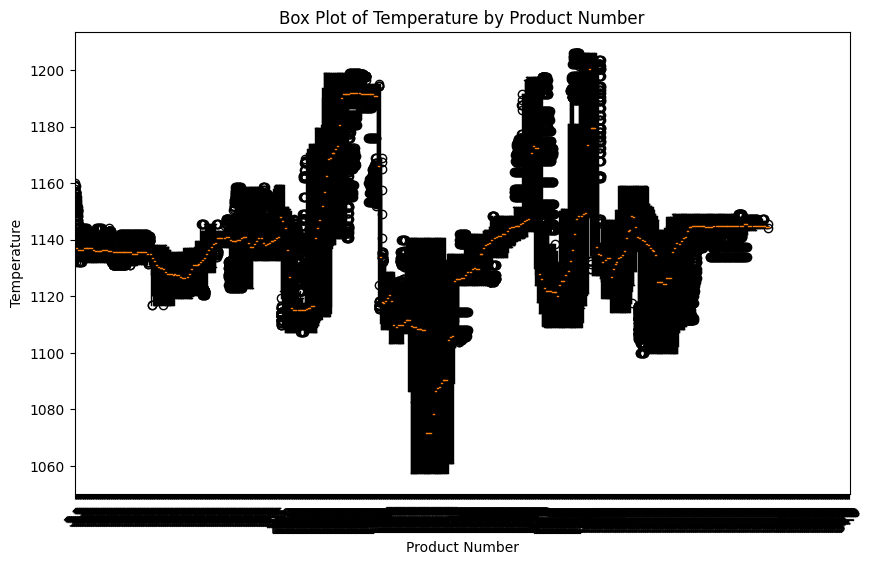

In [55]:
import matplotlib.pyplot as plt

box_plot_data = []
df2_SG = df2[df2['사내강종'] == 'GS-AE4119M2']
df2_dia =df2[df2['지시외경'] == 25.4]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2.iterrows():
    start_time = row['input_datetime']
    end_time = row['soaking_enter']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['heating_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
#plt.boxplot(box_plot_data, labels=df2['지시외경'])
plt.boxplot(box_plot_data)
x_labels=df2['지시외경'].tolist()
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.title('Box Plot of Temperature by Product Number')
plt.xlabel('Product Number')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()


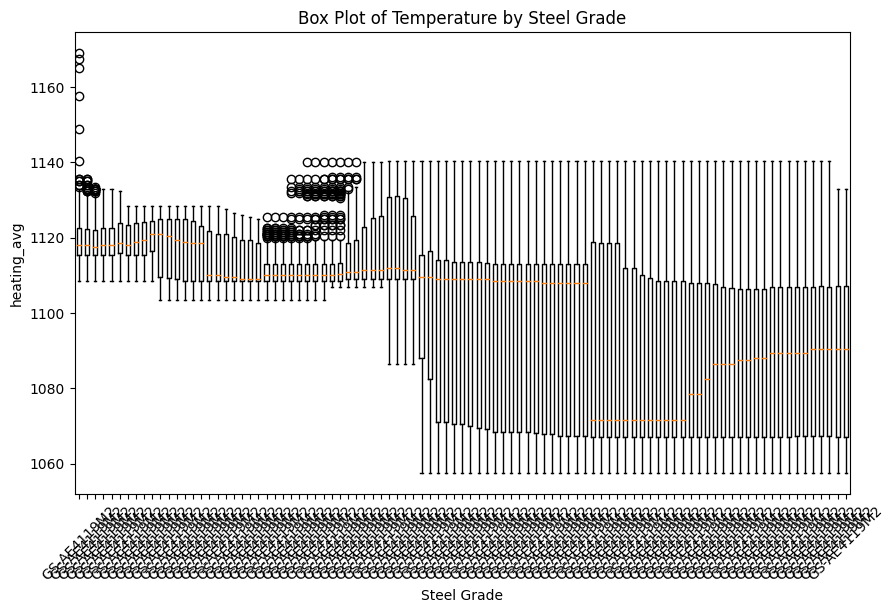

In [56]:
import matplotlib.pyplot as plt

box_plot_data = []
df2_SG = df2[df2['사내강종'] == 'GS-AE4119M2']
#df2_dia =df2[df2['지시외경'] == 10.5]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_SG.iterrows():
    start_time = row['input_datetime']
    end_time = row['soaking_enter']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['heating_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
#plt.boxplot(box_plot_data, labels=df2['지시외경'])
plt.boxplot(box_plot_data)
x_labels=df2_SG['사내강종'].tolist()
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')
plt.ylabel('heating_avg')
plt.xticks(rotation=45)
plt.show()

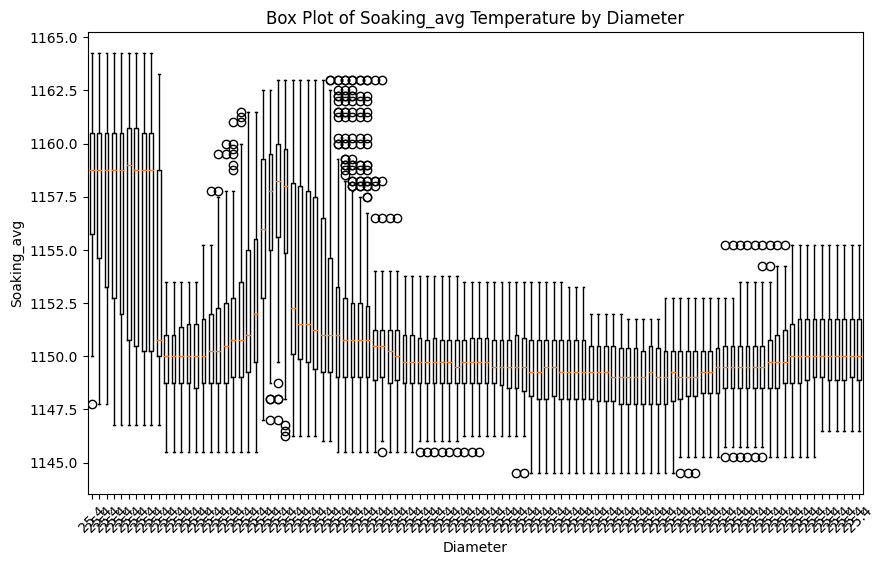

In [57]:
import matplotlib.pyplot as plt

box_plot_data = []
#df2_SG = df2[df2['사내강종'] == 'GS-AE4119M2']
df2_dia =df2[df2['지시외경'] == 25.4]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_dia.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
#plt.boxplot(box_plot_data, labels=df2['지시외경'])
plt.boxplot(box_plot_data)
x_labels=df2_dia['지시외경'].tolist()
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.title('Box Plot of Soaking_avg Temperature by Diameter')
plt.xlabel('Diameter')
plt.ylabel('Soaking_avg')
plt.xticks(rotation=45)
plt.show()

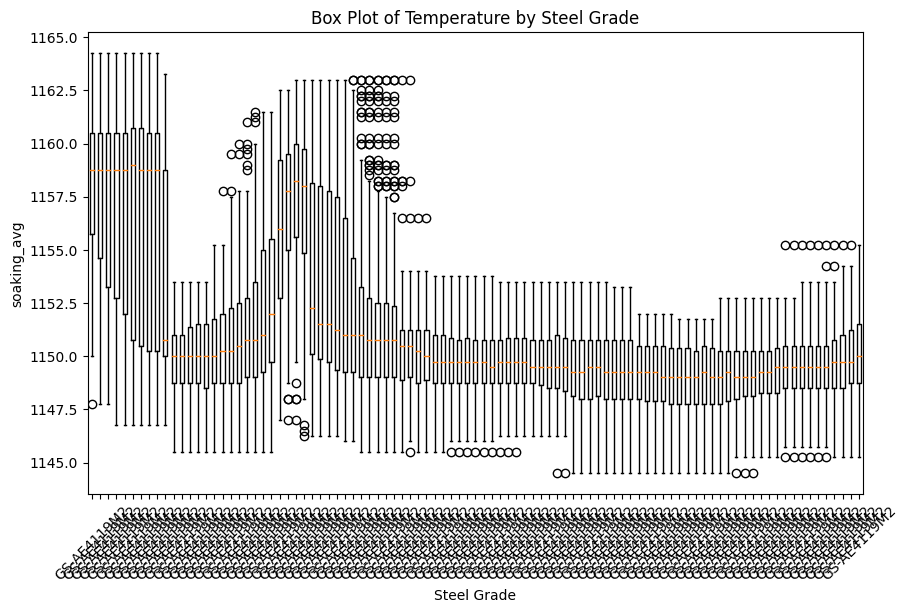

In [58]:
import matplotlib.pyplot as plt

box_plot_data = []
df2_SG = df2[df2['사내강종'] == 'GS-AE4119M2']
#df2_dia =df2[df2['지시외경'] == 25.4]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_SG.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
#plt.boxplot(box_plot_data, labels=df2['지시외경'])
plt.boxplot(box_plot_data)
x_labels=df2_SG['사내강종'].tolist()
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')
plt.ylabel('soaking_avg')
plt.xticks(rotation=45)
plt.show()

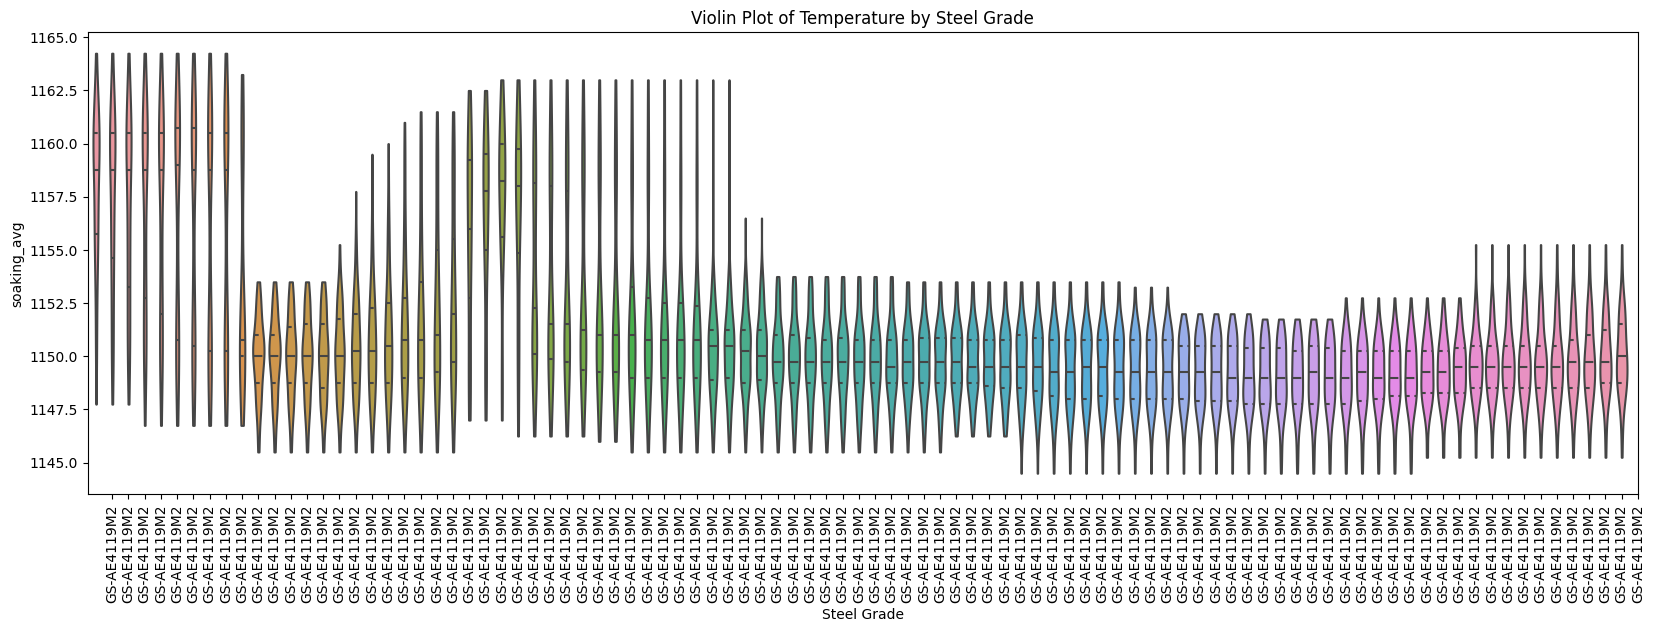

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

violin_plot_data = []

df2_SG = df2[df2['사내강종'] == 'GS-AE4119M2']
#df2_dia =df2[df2['지시외경'] == 25.4]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_SG.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    violin_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(20, 6))
sns.violinplot(data=violin_plot_data, inner="quart", cut=0)
x_labels=df2_SG['사내강종'].tolist()
plt.xticks(range(1, len(x_labels)+1), x_labels)
plt.xticks(rotation=90)
plt.title('Violin Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')
plt.ylabel('soaking_avg')
plt.show()

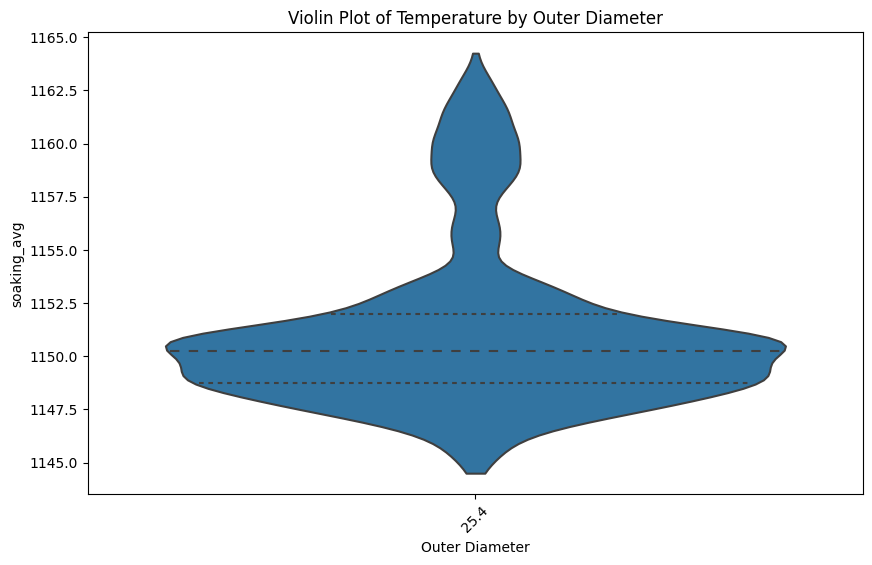

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

violin_plot_data = {}
df2_SG = df2[df2['사내강종'] == 'GS-AE4119M2']
#df2_dia =df2[df2['지시외경'] == 25.4]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_SG.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Store the temperature values in the dictionary with '지시외경' as the key
    diameter = row['지시외경']
    if diameter in violin_plot_data:
        violin_plot_data[diameter].extend(temperature_values)
    else:
        violin_plot_data[diameter] = temperature_values

# Create a violin plot by '지시외경'
plt.figure(figsize=(10, 6))
sns.violinplot(data=list(violin_plot_data.values()), inner="quart", cut=0)
plt.xticks(range(len(violin_plot_data)), violin_plot_data.keys())
plt.xticks(rotation=45)
plt.title('Violin Plot of Temperature by Outer Diameter')
plt.xlabel('Outer Diameter')
plt.ylabel('soaking_avg')
plt.show()

In [61]:
print("'지시외경' 열의 고유한 값들:", df2['지시외경'].unique())
print("'지시외경' 열의 고유한 값 개수:", len(df2['지시외경'].unique()))
print("'사내강종' 열의 고유한 값들:", df2['사내강종'].unique())
print("'사내강종' 열의 고유한 값 개수:", len(df2['사내강종'].unique()))

'지시외경' 열의 고유한 값들: [ 5.5 26.  25.4 27.  28.  30.  32.  54. ]
'지시외경' 열의 고유한 값 개수: 8
'사내강종' 열의 고유한 값들: ['STS304H1S5' 'SM45C1' 'S45CS1' 'S55CMHIWIN' 'AE51B35C' 'SCM435HS2'
 'SNB16S3' 'STS304SX' '316LDSZ' 'STS303CS9' 'STS303S1' 'STS303SZ'
 'STS303SX' 'STR3S1' 'ALLOYC276S1' 'B50A365BS2' 'GS-AE4119M2'
 'GS-AE4318M2' 'SWRCH45F1' 'AE4140S2' 'SCM435S1' 'SWRCH18A' 'STS304S5'
 '316LDS2' 'STS303FS8' 'ALLOY625S2' 'SM35C1' '316LDS1' 'STS416S3'
 '316LDS3' '304LDS3' 'STD61S20' 'ALLOYK500S2' 'STR660CLDS2' 'AE51B20C'
 'SM25C1' 'SCM440HS2' '304LDS1' 'STS410S1' '316LDSY' 'STS316LEPSC'
 'W4057S2']
'사내강종' 열의 고유한 값 개수: 42


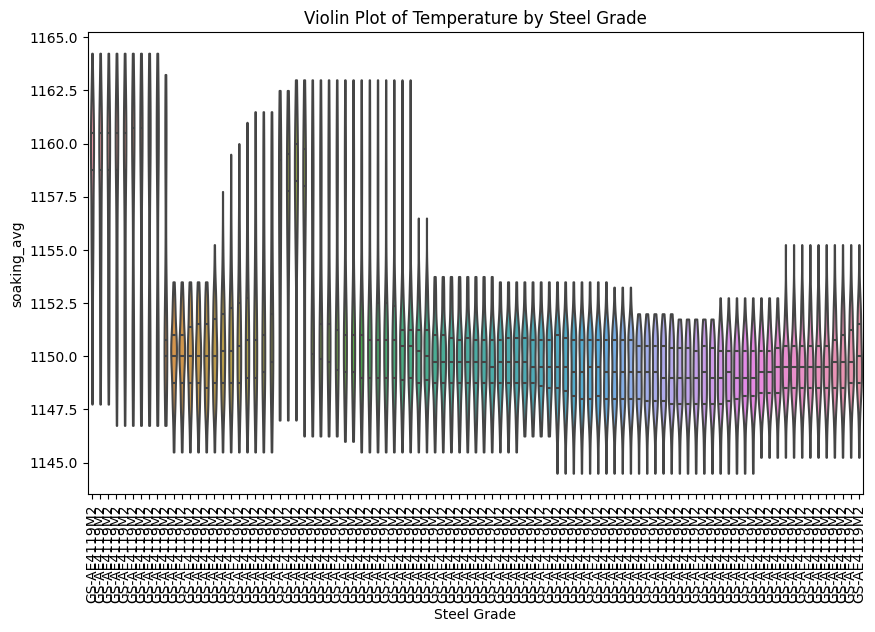

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

violin_plot_data = []

# 조건: '사내강종'이 'SCM435S1'이면서 '지시외경'이 10.5인 경우
condition = (df2['사내강종'] == 'GS-AE4119M2') & (df2['지시외경'] == 25.4)

# 조건을 만족하는 데이터를 선택하여 df2_filtered에 저장
df2_filtered = df2[condition]

# 조건이 None (빈 조건) 인 경우 전체 df2 데이터를 선택
if condition is None:
    df2_filtered = df2.copy()

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_filtered.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    violin_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
sns.violinplot(data=violin_plot_data, inner="quart", cut=0)
x_labels=df2_filtered['사내강종'].tolist()
plt.xticks(range(len(x_labels)), x_labels)
plt.xticks(rotation=90)
plt.title('Violin Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')
plt.ylabel('soaking_avg')
plt.show()

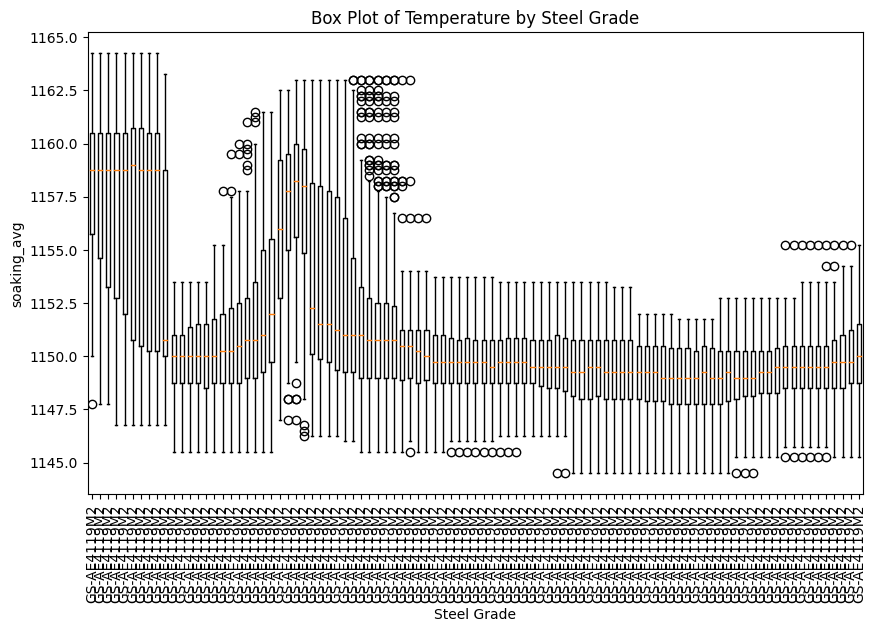

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

box_plot_data = []

# 조건: '사내강종'이 'SCM435S1'이면서 '지시외경'이 9.5인 경우
condition = (df2['사내강종'] == 'GS-AE4119M2') & (df2['지시외경'] == 25.4)

# 조건을 만족하는 데이터를 선택하여 df2_filtered에 저장
df3_filtered = df2[condition]

# 조건이 비어 있는 경우 (None) 전체 df2 데이터를 선택
if df3_filtered.empty:
    df3_filtered = df2.copy()

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df3_filtered.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
plt.boxplot(box_plot_data, labels=df3_filtered['사내강종'].tolist())
plt.xticks(rotation=90)
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')
plt.ylabel('soaking_avg')
plt.show()

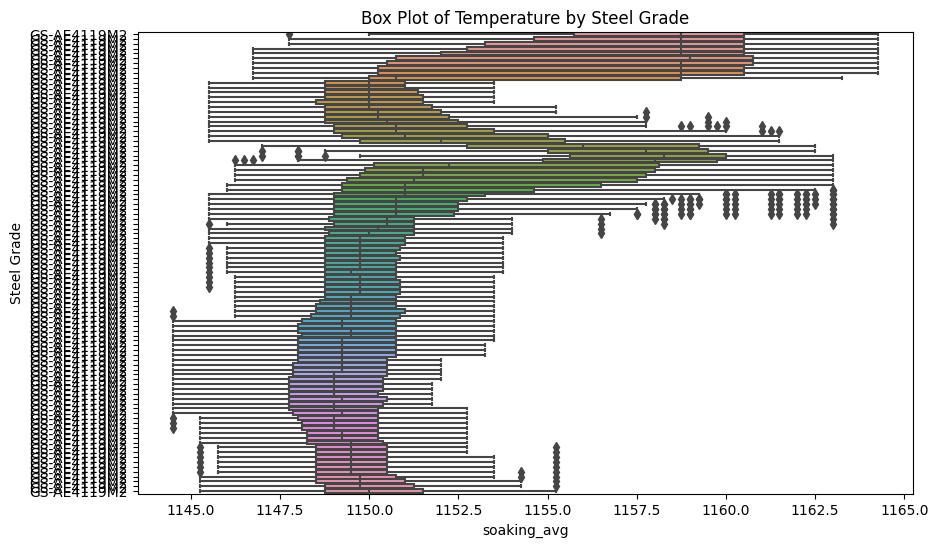

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

box_plot_data = []

# 조건: '사내강종'이 'STS430FS6'이면서 '지시외경'이 11인 경우
condition = (df2['사내강종'] == 'GS-AE4119M2') & (df2['지시외경'] == 25.4)

# 조건을 만족하는 데이터를 선택하여 df2_filtered에 저장
df3_filtered = df2[condition]

# 조건이 비어 있는 경우 (None) 전체 df2 데이터를 선택
if df3_filtered.empty:
    df3_filtered = df2.copy()

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df3_filtered.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=box_plot_data, orient='horizontal')
plt.yticks(range(len(df3_filtered['사내강종'])), df3_filtered['사내강종'].tolist())
plt.xticks(rotation=0)
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('soaking_avg')
plt.ylabel('Steel Grade')
plt.show()


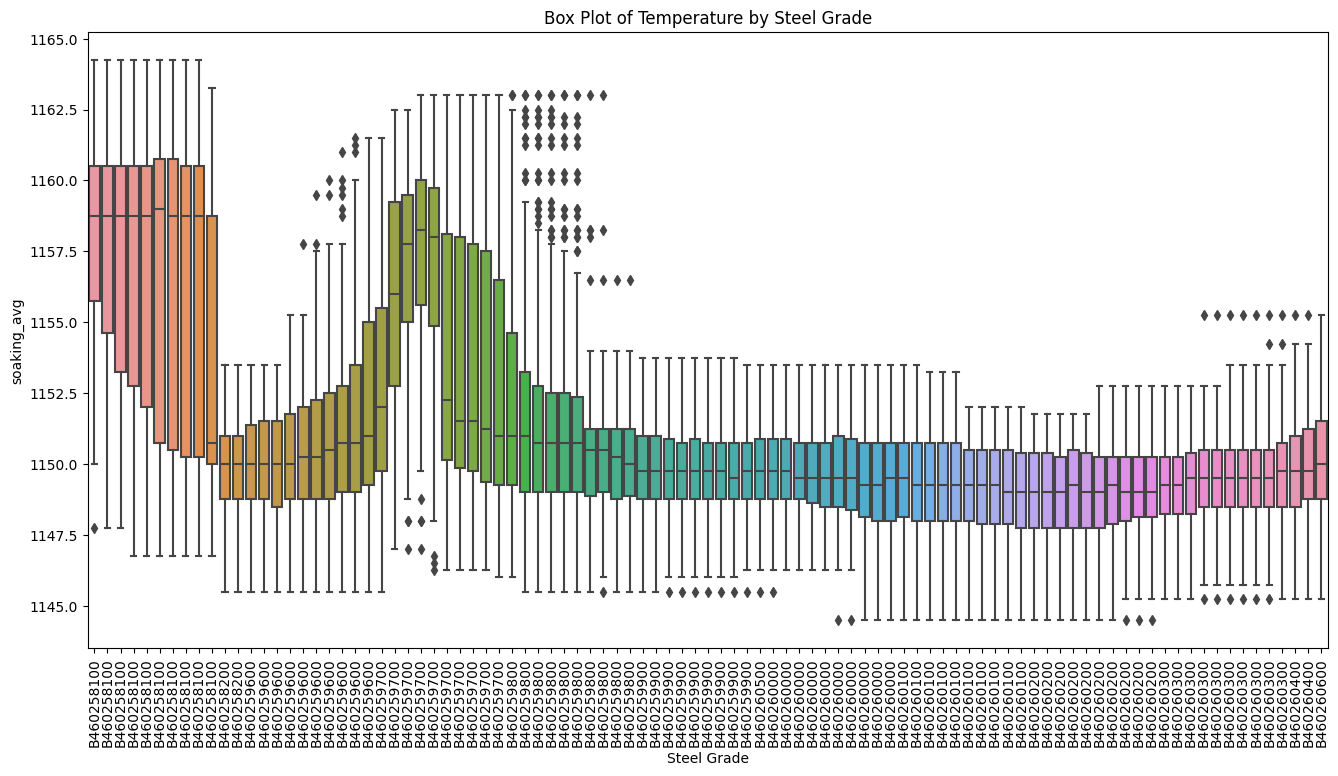

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

box_plot_data = []

# 조건: '사내강종'이 'STS430FS6'이면서 '지시외경'이 11인 경우
condition = (df2['사내강종'] == 'GS-AE4119M2') & (df2['지시외경'] == 25.4)

# 조건을 만족하는 데이터를 선택하여 df2_filtered에 저장
df3_filtered = df2[condition]

# 조건이 비어 있는 경우 (None) 전체 df2 데이터를 선택
if df3_filtered.empty:
    df3_filtered = df2.copy()

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df3_filtered.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a horizontal box plot using seaborn with x and y axes swapped
plt.figure(figsize=(16, 8))
sns.boxplot(data=box_plot_data, orient='vertical')  # Changed 'horizontal' to 'vertical'
plt.xticks(range(len(df3_filtered['LOT NO'])), df3_filtered['LOT NO'].tolist(), rotation=90)  # Rotate x-axis labels, X축 사내강종을 LOT NO 로 변경
plt.yticks(rotation=0)  # Rotate y-axis labels
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')  # Changed 'soaking_avg' to 'Steel Grade' for x-label
plt.ylabel('soaking_avg')  # Changed 'Steel Grade' to 'soaking_avg' for y-label
plt.show()


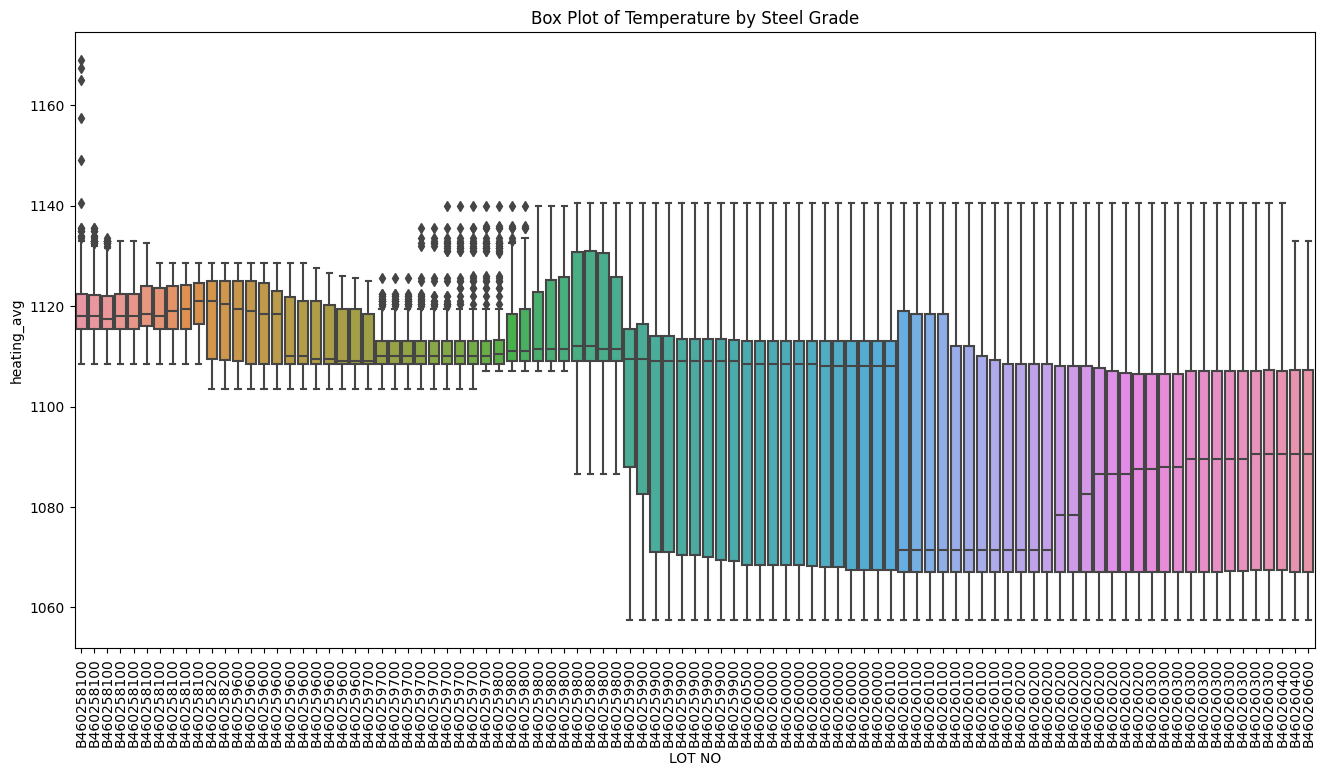

In [66]:
# 가열대 온도 
import matplotlib.pyplot as plt
import seaborn as sns

box_plot_data = []

# 조건: '사내강종'이 'STS430FS6'이면서 '지시외경'이 11인 경우
condition = (df2['사내강종'] == 'GS-AE4119M2') & (df2['지시외경'] == 25.4)

# 조건을 만족하는 데이터를 선택하여 df2_filtered에 저장
df4_filtered = df2[condition]

# 조건이 비어 있는 경우 (None) 전체 df2 데이터를 선택
if df4_filtered.empty:
    df4_filtered = df2.copy()

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df4_filtered.iterrows():
    start_time = row['input_datetime']
    end_time = row['soaking_enter']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['heating_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a horizontal box plot using seaborn with x and y axes swapped
plt.figure(figsize=(16, 8))
sns.boxplot(data=box_plot_data, orient='vertical')  # Changed 'horizontal' to 'vertical'
plt.xticks(range(len(df4_filtered['LOT NO'])), df4_filtered['LOT NO'].tolist(), rotation=90)  # Rotate x-axis labels
plt.yticks(rotation=0)  # Rotate y-axis labels
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('LOT NO')  # Changed 'soaking_avg' to 'Steel Grade' for x-label, Steel Grade를 Lot로 변경
plt.ylabel('heating_avg')  # Changed 'Steel Grade' to 'heating_avg' for y-label
plt.show()


In [67]:
# 그래프 가열대 모니터링 및 균열대 모니터링 코드 2개 합치고, 한번에 그래프 2개 동시에 표현 할수 있는 코드로 변경